# House Price Prevision
In this notebook we will use a dataset to predict house prizes

## Enviornment section

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Preprocessing

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.sample(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
573,574,80,RL,76.0,9967,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,170000
198,199,75,RM,92.0,5520,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000
1295,1296,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2006,WD,Normal,138500
819,820,120,RL,44.0,6371,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,224000
214,215,60,RL,NaN,10900,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,450,3,2010,WD,Normal,161750


In [4]:
df.shape

(1460, 81)

In [5]:
print(df.isna().sum().to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [6]:
# Let's drop columns with too much missing values
df_origin =df.copy()
cl = ['Alley', 'FireplaceQu','PoolQC', 'Fence', 'MiscFeature', 'LotFrontage', 'Id', 'Utilities', 'Street'];
df.drop(inplace = True, columns = cl)

In [7]:
print(df.isna().sum().to_string())

MSSubClass        0
MSZoning          0
LotArea           0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0


In [8]:
# get some basic ideas about the data

def summerize_data(df):
    categorical = 0;
    numerical = 0;
    for column in df.columns:
        if df.dtypes[column] == np.object: # Categorical data
            categorical+=1
        else:
            numerical+=1
            
    print("# Categorical = {}\n# Numerical = {} ".format(categorical, numerical))
    
summerize_data(df)

# Categorical = 36
# Numerical = 36 


Let's do a correlation matrix for numerical variables to understand what variables are more correlated to sales price

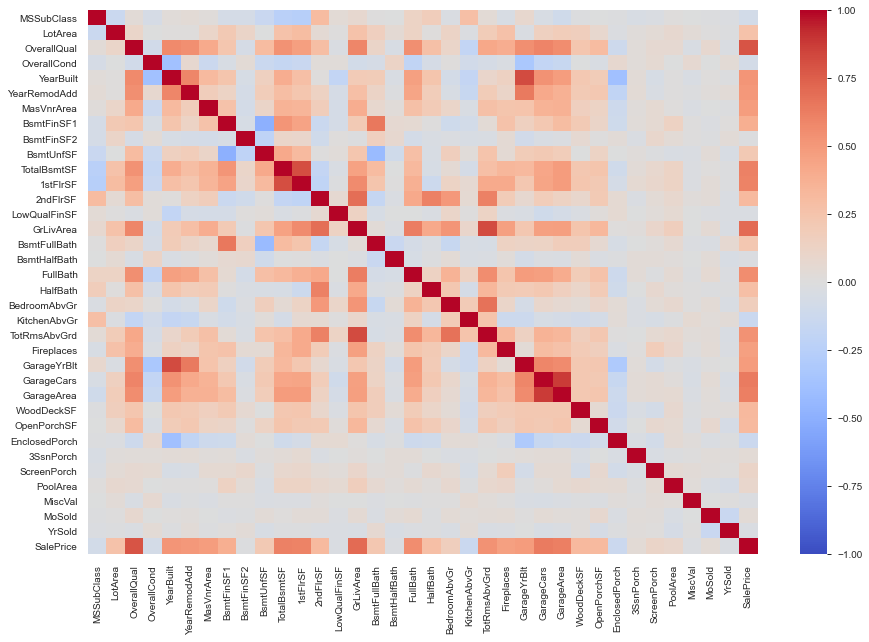

In [9]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df.corr() , vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax = ax)

In [10]:
df_corr = df.corr()
df_corr = df_corr[['SalePrice']]

In [11]:
thr = 0.25
df_corr_filtered = df_corr[(df_corr['SalePrice']<thr) & (df_corr['SalePrice']>-thr)]
numericalVariablesToDrop = df_corr_filtered.index.values.tolist()
df.drop(inplace = True, columns = numericalVariablesToDrop)

In [12]:
df.isna().sum()

MSZoning          0
LotArea           0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
FullBath          0
HalfBath          0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
GarageQual       81
GarageCond       81


In [13]:
df.dropna(inplace=True)

In [14]:
# get some basic ideas about the data
def separateNumericalCategoricalVariables(df_input):
    df_cat = pd.DataFrame()
    df_num = pd.DataFrame()
    for column in df.columns:
        if df_input.dtypes[column] == np.object: # Categorical data
            df_cat[column] = df_input[column]
        else:
            df_num[column] = df_input[column] 
            
    return df_cat, df_num
    
df_cat, df_num = separateNumericalCategoricalVariables(df)
cat_col = list(df_cat.columns)
num_col = list(df_num.columns)
num_col.remove('SalePrice')

In [15]:
for column in df_cat.columns:
    print(df[column].value_counts())
    print("\n")

RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64


Reg    829
IR1    459
IR2     40
IR3     10
Name: LotShape, dtype: int64


Lvl    1206
Bnk      52
HLS      48
Low      32
Name: LandContour, dtype: int64


Inside     957
Corner     244
CulDSac     90
FR2         43
FR3          4
Name: LotConfig, dtype: int64


Gtl    1265
Mod      61
Sev      12
Name: LandSlope, dtype: int64


NAmes      209
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     53
Crawfor     50
BrkSide     47
Mitchel     42
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


Norm      1162
Feedr       63
Artery      43
RRAn        26
PosN        19
RRAe        10
PosA         8
RRNn         5
RRNe         2
Name: Condit

In [16]:
df_cat = pd.get_dummies(df_cat)

In [17]:
y = df_num['SalePrice']
df_num.drop(columns = ['SalePrice'], inplace=True)
scaler = MinMaxScaler()
col = df_num.columns
df_num = pd.DataFrame(scaler.fit_transform(df_num))
df_num.columns = col

In [18]:
df_cat = df_cat.reset_index(drop=True)
df_num = df_num.reset_index(drop=True)

result = pd.DataFrame()

In [19]:
result[df_cat.columns] = df_cat

In [20]:
result[df_num.columns] = df_num

In [21]:
X = result

**Now the dataset is ready for modeling**

## Test File

**We import at first the test file and then implement the model because one hot encoding could be different for train and test set. So we apply at first the function align with inner join and then could build the model**

In [22]:
df_test = pd.read_csv('test.csv')

In [23]:
cl.remove('Id')
df_test.drop(inplace = True, columns = cl)
df_test.dropna(axis = 1, inplace=True)
ids = df_test['Id']
df_test.drop(columns = ['Id'], inplace = True)

In [24]:
df_test_cat, df_test_num = separateNumericalCategoricalVariables(df_test)

In [ ]:
df_test_cat = df_test_cat[cat_col]
df_test_num = df_test_num[num_col]

In [ ]:
### Transform dataset
df_test_cat = pd.get_dummies(df_test_cat)
df_test_num = pd.DataFrame(scaler.fit_transform(df_test_num))
df_test_num.columns = col

### Dropping indices
df_test_cat = df_test_cat.reset_index(drop=True)
df_test_num = df_test_num.reset_index(drop=True)

### Create Datafrae
result = pd.DataFrame()
result[df_test_cat.columns] = df_test_cat
result[df_test_num.columns] = df_test_num

### Test
Z = result

In [ ]:
final_train, final_test = X.align(Z, join='inner', axis=1)  # inner join

In [ ]:
X = final_train
Z = final_test

## Model

In [ ]:
## Simple Linear Regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

print(reg.score(X_train, y_train))

#$94$% of $R^2$ is very good!

y_pred = reg.predict(X_test)

print(mean_squared_error(abs(y_pred), y_test))

#MSE is too much high

#profile = df.profile_report(title='Pandas Profiling Report')
#profile.to_file(output_file="House-Price.html")


In [ ]:
y_text_pred = reg.predict(Z)

In [ ]:
### Print out
output = pd.DataFrame()

In [ ]:
output['Id'] = ids
output['SalePrice'] = y_text_pred

In [ ]:
output.to_csv('MySubmission.csv', index = None, sep = ',' )